In [1]:
import getpass
import os
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import pykeen
import torch
from pykeen.pipeline import pipeline

%matplotlib inline

In [2]:
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [3]:
print(time.asctime())

Sun Mar 14 13:35:38 2021


In [4]:

print(getpass.getuser())

shahz


In [5]:
print(pykeen.get_version(with_git_hash=True))

1.4.0-UNHASHED


In [110]:
result = pipeline(
    dataset='Nations',
    model='RotatE',
    random_seed=1235,
    device='cpu',
    training_kwargs=dict(num_epochs=100),  # Shouldn't take more than a minute or two on a nice computer
)

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds


In [119]:
result

PipelineResult(random_seed=1235, model=RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(55, 400)
  )
), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x0000024024371F40>, losses=[0.004362222462443251, 0.004279505367854133, 0.004190522821704347, 0.00415098277767699, 0.004086745893535902, 0.004032049271928605, 0.0039364126085036965, 0.0038983375208461704, 0.003837279900534069, 0.003818197166500379, 0.0037511558688465675, 0.003789631565611566, 0.0037494035596823574, 0.003650600249743342, 0.0036557899348100826, 0.0036934994572970135, 0.0038585387282635097, 0.0036518981483713467, 0.0036909988327841065, 0.0036164818696640243, 0.003702789320418583, 0.003640433651718063, 0.003602575679220746, 0.003655036302966688, 0.0035636409293467075, 0.0036345944557357674, 0.0035973772706098892, 0.003701441813653438, 0.003551757

In [112]:
save_location = 'nations_transe'  # relative to here
result.save_to_directory(save_location)
os.listdir(save_location)

['metadata.json', 'results.json', 'trained_model.pkl']

In [113]:
# How to look at the model
model = result.model
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(55, 400)
  )
)

In [114]:
# How to look at the triples
tf = model.triples_factory
tf

TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt")

In [115]:
tf.num_entities, tf.num_relations, tf.num_triples

(14, 55, 1592)

AttributeError: 'NoneType' object has no attribute 'set_ylabel'

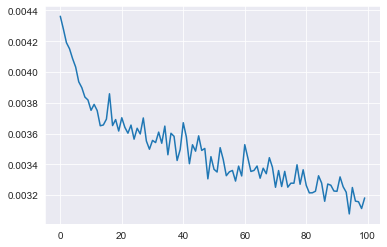

In [117]:
result.plot_losses()
plt.show()

In [118]:
result.metric_results.to_df()

,Side,Type,Metric,Value
0,both,avg,adjusted_mean_rank,0.839738
1,head,avg,adjusted_mean_rank,0.958865
2,tail,avg,adjusted_mean_rank,0.720611
3,both,avg,mean_rank,3.932836
4,both,avg,mean_reciprocal_rank,0.456060
5,both,avg,hits_at_1,0.243781
6,both,avg,hits_at_3,0.572139
7,both,avg,hits_at_5,0.746269
8,both,avg,hits_at_10,0.955224
9,both,worst,mean_rank,3.932836


In [15]:
import pandas as pd
data=pd.read_csv('KG_dataset_1_family_medicine.csv')

In [136]:
data=data.drop(['subject_type','object_type'], axis=1)

KeyError: "['subject_type' 'object_type'] not found in axis"

In [21]:
data

,subject,relation,object
0,Family physicians,hold,M.D.
1,certification,requires,five years
2,term Primary Care,include,services
3,Family physicians,deliver,range
4,family physicians,treat,patients
...,...,...,...
2302,the British Library,announced,support
2303,process,reveal,errors
2304,publishers,provide,PDF
2305,system,provides,search capability


In [150]:
#prestratisfied data NAtions

In [95]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets.nations import NATIONS_TRAIN_PATH, NATIONS_TEST_PATH
result = pipeline(
    training=NATIONS_TRAIN_PATH,
    testing=NATIONS_TEST_PATH,
    model='TransE',
    training_kwargs=dict(num_epochs=5),  # short epochs for testing - you should go higher
)
result.save_to_directory('doctests/test_pre_stratified_transe')


INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds


In [132]:
import torch

my_pykeen_model = torch.load('doctests/test_pre_stratified_transe/trained_model.pkl')

In [157]:
my_pykeen_model.relation_embeddings

Embedding(
  (_embeddings): Embedding(55, 50)
)

In [158]:
entity_embeddings: torch.FloatTensor = model.entity_embeddings()

In [162]:
entity_embeddings.shape

torch.Size([3546, 400])

In [160]:
Nations().testing.mapped_triples

tensor([[ 0,  7,  5],
        [ 0, 14, 11],
        [ 0, 18, 12],
        [ 0, 20,  3],
        [ 0, 20, 10],
        [ 0, 21, 12],
        [ 1,  3, 12],
        [ 1,  7,  0],
        [ 1, 10, 11],
        [ 1, 18,  5],
        [ 1, 21,  6],
        [ 1, 28,  7],
        [ 1, 33,  4],
        [ 1, 33,  6],
        [ 1, 33, 13],
        [ 1, 38,  4],
        [ 1, 38,  7],
        [ 1, 38, 12],
        [ 1, 39,  7],
        [ 1, 42,  2],
        [ 1, 49,  2],
        [ 2,  0, 11],
        [ 2,  6,  0],
        [ 2, 14,  1],
        [ 2, 14,  4],
        [ 2, 14,  6],
        [ 2, 21,  5],
        [ 2, 21, 12],
        [ 2, 21, 13],
        [ 2, 26,  5],
        [ 2, 30,  1],
        [ 2, 30,  6],
        [ 2, 37,  3],
        [ 2, 37, 13],
        [ 2, 38,  0],
        [ 2, 45,  0],
        [ 3, 19, 12],
        [ 3, 21, 11],
        [ 3, 25, 11],
        [ 3, 28,  7],
        [ 3, 30,  2],
        [ 3, 33,  2],
        [ 3, 33,  4],
        [ 3, 37, 13],
        [ 3, 38,  4],
        [ 

In [151]:
#BYOData Prestratisfied

In [98]:
pykeen.datasets.nations.NATIONS_TEST_PATH

'C:\\Users\\shahz\\anaconda3\\lib\\site-packages\\pykeen\\datasets\\nations\\test.txt'

In [140]:
NATIONS_TRAIN_PATH='C:\\Users\\shahz\\KG\\Untitled Folder\\test.txt'
NATIONS_TEST_PATH='C:\\Users\\shahz\\KG\\Untitled Folder\\train.txt'
result = pipeline(
    training=NATIONS_TRAIN_PATH, 
    testing=NATIONS_TEST_PATH,
    model='RotatE',
    random_seed=1235,
    device='cpu',
    training_kwargs=dict(num_epochs=100),  # Shouldn't take more than a minute or two on a nice computer
)

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 18.66s seconds


In [141]:
save_location = 'nations_transe'  # relative to here
result.save_to_directory(save_location)
os.listdir(save_location)

['metadata.json', 'results.json', 'trained_model.pkl']

In [142]:
# How to look at the model
model = result.model
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(3546, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(783, 400)
  )
)

In [143]:
# How to look at the triples
tf = model.triples_factory
tf

TriplesFactory(num_entities=3546, num_relations=783, num_triples=2231, inverse_triples=False, path="C:\Users\shahz\KG\Untitled Folder\test.txt")

AttributeError: 'NoneType' object has no attribute 'set_ylabel'

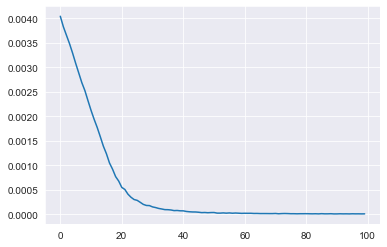

In [144]:
result.plot_losses()
plt.show()

In [145]:
result.metric_results.to_df()

,Side,Type,Metric,Value
0,both,avg,adjusted_mean_rank,0.000564
1,head,avg,adjusted_mean_rank,0.000564
2,tail,avg,adjusted_mean_rank,0.000564
3,both,avg,mean_rank,1.000000
4,both,avg,mean_reciprocal_rank,1.000000
5,both,avg,hits_at_1,1.000000
6,both,avg,hits_at_3,1.000000
7,both,avg,hits_at_5,1.000000
8,both,avg,hits_at_10,1.000000
9,both,worst,mean_rank,1.000000


In [146]:
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(3546, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(783, 400)
  )
)

In [163]:
#unstratisfied 


In [165]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets.nations import NATIONS_TRAIN_PATH
tf = TriplesFactory.from_path(NATIONS_TRAIN_PATH)
training, testing = tf.split([.8, .2])
result = pipeline(
    training=training,
    testing=testing,
    model='TransE',
    training_kwargs=dict(num_epochs=5),  # short epochs for testing - you should go higher
)
result.save_to_directory('doctests/test_unstratified_transe')

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [1206, 319]


INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds


In [168]:
os.listdir('doctests')

['test_pre_stratified_transe', 'test_unstratified_transe']

In [169]:
# How to look at the model
model = result.model
model

TransE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14, 50)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(55, 50)
  )
)

In [171]:
entity_embeddings: torch.FloatTensor = model.entity_embeddings(indices=None)

In [174]:
entity_embeddings

tensor([[-2.1499e-01,  2.7281e-02,  1.9214e-01, -1.2540e-01,  1.6117e-01,
          2.3762e-02, -1.1343e-01, -1.3421e-01, -2.2317e-01, -4.6490e-02,
         -2.1401e-01,  9.3223e-02,  2.4952e-02,  4.5350e-02, -3.5010e-02,
         -1.0255e-01, -1.0898e-01, -1.2464e-01,  1.6082e-01,  5.9804e-02,
         -4.9179e-02, -2.3760e-01,  1.6048e-02,  8.3073e-02,  7.3173e-02,
         -4.8807e-02, -9.4093e-02,  3.5921e-02, -2.5134e-01, -1.5437e-01,
          1.9384e-01, -9.9716e-02, -8.1347e-02, -1.8746e-01,  6.3545e-02,
         -4.6294e-02,  1.1736e-01,  2.1399e-01,  2.0510e-01,  1.8455e-01,
         -5.7783e-02,  9.5355e-02,  7.7772e-02, -2.4591e-01, -1.6784e-01,
          2.3722e-01, -1.7855e-01,  1.8750e-01, -1.8075e-01,  8.7604e-03],
        [ 1.3883e-01, -2.1235e-01, -8.7139e-02, -1.5390e-01,  1.3331e-01,
         -2.2222e-02, -6.8480e-02, -1.1099e-01,  8.6718e-02,  7.1113e-02,
         -1.2457e-01, -4.7957e-02,  3.3178e-02, -2.1442e-01, -7.1522e-02,
         -6.8888e-02,  5.5688e-02,  4

In [ ]:
#Individually pipeline


In [100]:
from pykeen.models import TransE
model = TransE(triples_factory=training_triples_factory)

In [101]:
from torch.optim import Adam
optimizer = Adam(params=model.get_grad_params())

In [102]:
from pykeen.training import SLCWATrainingLoop
training_loop = SLCWATrainingLoop(model=model, optimizer=optimizer)

In [103]:
training_loop.train(num_epochs=5, batch_size=256)

[0.0062235357174322235,
 0.006301636372379322,
 0.00615978413191273,
 0.005988228485811895,
 0.005844339129313752]

In [122]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

In [148]:
# Get triples to test
mapped_triples = dataset.testing.mapped_triples

In [149]:
mapped_triples

tensor([[ 0,  7,  5],
        [ 0, 14, 11],
        [ 0, 18, 12],
        [ 0, 20,  3],
        [ 0, 20, 10],
        [ 0, 21, 12],
        [ 1,  3, 12],
        [ 1,  7,  0],
        [ 1, 10, 11],
        [ 1, 18,  5],
        [ 1, 21,  6],
        [ 1, 28,  7],
        [ 1, 33,  4],
        [ 1, 33,  6],
        [ 1, 33, 13],
        [ 1, 38,  4],
        [ 1, 38,  7],
        [ 1, 38, 12],
        [ 1, 39,  7],
        [ 1, 42,  2],
        [ 1, 49,  2],
        [ 2,  0, 11],
        [ 2,  6,  0],
        [ 2, 14,  1],
        [ 2, 14,  4],
        [ 2, 14,  6],
        [ 2, 21,  5],
        [ 2, 21, 12],
        [ 2, 21, 13],
        [ 2, 26,  5],
        [ 2, 30,  1],
        [ 2, 30,  6],
        [ 2, 37,  3],
        [ 2, 37, 13],
        [ 2, 38,  0],
        [ 2, 45,  0],
        [ 3, 19, 12],
        [ 3, 21, 11],
        [ 3, 25, 11],
        [ 3, 28,  7],
        [ 3, 30,  2],
        [ 3, 33,  2],
        [ 3, 33,  4],
        [ 3, 37, 13],
        [ 3, 38,  4],
        [ 

In [125]:
results = evaluator.evaluate(model, mapped_triples, batch_size=1024)
print(results)

INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds



RankBasedMetricResults(mean_rank={'both': {'avg': 3.9328358208955225, 'worst': 3.9328358208955225, 'best': 3.9328358208955225}, 'head': {'avg': 4.402985074626866, 'worst': 4.402985074626866, 'best': 4.402985074626866}, 'tail': {'avg': 3.462686567164179, 'worst': 3.462686567164179, 'best': 3.462686567164179}}, mean_reciprocal_rank={'both': {'avg': 0.4560604541947825, 'worst': 0.4560604541947825, 'best': 0.4560604541947825}, 'head': {'avg': 0.40329347269645777, 'worst': 0.40329347269645777, 'best': 0.40329347269645777}, 'tail': {'avg': 0.5088274356931073, 'worst': 0.5088274356931073, 'best': 0.5088274356931073}}, hits_at_k={'both': {'avg': {1: 0.24378109452736318, 3: 0.572139303482587, 5: 0.746268656716418, 10: 0.9552238805970149}, 'worst': {1: 0.24378109452736318, 3: 0.572139303482587, 5: 0.746268656716418, 10: 0.9552238805970149}, 'best': {1: 0.24378109452736318, 3: 0.572139303482587, 5: 0.746268656716418, 10: 0.9552238805970149}}, 'head': {'avg': {1: 0.19402985074626866, 3: 0.5024875

In [126]:

results.plot_losses()
plt.show()

AttributeError: 'RankBasedMetricResults' object has no attribute 'plot_losses'

In [130]:
results

RankBasedMetricResults(mean_rank={'both': {'avg': 3.9328358208955225, 'worst': 3.9328358208955225, 'best': 3.9328358208955225}, 'head': {'avg': 4.402985074626866, 'worst': 4.402985074626866, 'best': 4.402985074626866}, 'tail': {'avg': 3.462686567164179, 'worst': 3.462686567164179, 'best': 3.462686567164179}}, mean_reciprocal_rank={'both': {'avg': 0.4560604541947825, 'worst': 0.4560604541947825, 'best': 0.4560604541947825}, 'head': {'avg': 0.40329347269645777, 'worst': 0.40329347269645777, 'best': 0.40329347269645777}, 'tail': {'avg': 0.5088274356931073, 'worst': 0.5088274356931073, 'best': 0.5088274356931073}}, hits_at_k={'both': {'avg': {1: 0.24378109452736318, 3: 0.572139303482587, 5: 0.746268656716418, 10: 0.9552238805970149}, 'worst': {1: 0.24378109452736318, 3: 0.572139303482587, 5: 0.746268656716418, 10: 0.9552238805970149}, 'best': {1: 0.24378109452736318, 3: 0.572139303482587, 5: 0.746268656716418, 10: 0.9552238805970149}}, 'head': {'avg': {1: 0.19402985074626866, 3: 0.50248756

In [22]:
# Get a training dataset
from pykeen.datasets import Nations
dataset = Nations()
training_triples_factory = dataset.training

In [83]:
type(training_triples_factory)

pykeen.triples.triples_factory.TriplesFactory

In [28]:
print(dataset)

Nations(num_entities=14, num_relations=55)


In [42]:
type(training_triples_factory)

pykeen.triples.triples_factory.TriplesFactory

In [39]:
f = open("C:\\Users\\shahz\\anaconda3\\lib\\site-packages\\pykeen\\datasets\\nations\\train.txt", "r")
print(f.read())

netherlands	militaryalliance	uk
egypt	intergovorgs3	usa
jordan	relbooktranslations	usa
poland	timesincewar	ussr
uk	negativebehavior	ussr
poland	relintergovorgs	uk
usa	weightedunvote	india
china	accusation	india
uk	unweightedunvote	egypt
poland	embassy	netherlands
jordan	commonbloc1	ussr
cuba	relintergovorgs	indonesia
jordan	commonbloc2	israel
uk	intergovorgs3	usa
israel	commonbloc1	usa
uk	ngoorgs3	brazil
indonesia	commonbloc1	cuba
usa	embassy	netherlands
netherlands	exports3	uk
usa	economicaid	israel
egypt	booktranslations	usa
brazil	weightedunvote	uk
brazil	relexports	uk
india	relbooktranslations	uk
usa	intergovorgs	netherlands
uk	independence	cuba
egypt	reltreaties	china
china	negativebehavior	uk
usa	ngo	poland
uk	weightedunvote	netherlands
india	ngoorgs3	brazil
netherlands	commonbloc1	indonesia
usa	blockpositionindex	india
israel	embassy	poland
israel	commonbloc2	egypt
egypt	embassy	brazil
poland	embassy	cuba
burma	relintergovorgs	uk
uk	relexports	usa
egypt	relstudents	uk
brazil	int

In [82]:
f = open("test.txt", "r", encoding="utf-8")
print(f.read())

Family physicians	hold	M.D.
certification	requires	five years
term Primary Care	include	services
Family physicians	deliver	range
family physicians	treat	patients
Family medicine	play	important role
family physicians	provide	care
Family physicians	complete	undergraduate degree
Family physicians residency training	includes	rotations
Residents	provide	care
Family physicians	pursue	fellowships
The American Board of Family Medicine	offer	Certificates of Added
patients	have	direct access
1 % deterioration	produce	10 % deterioration
2017 more than 1,061 practices	employing	pharmacists
Northumbria Healthcare NHS Foundation Trust	taken over	multiple GP practices
40%	got	day appointment
Association of Departments of Family Medicine	demanded	increased funding
new GP contract	included	funding
Indian Medical Council	requires	three-year residency
curriculum	comprises	medicine
candidates	receive	integrated inpatient outpatient learning
candidates	receive	field training
Calicut	started	MD (FM
residenc

In [40]:
type(f)

_io.TextIOWrapper

In [89]:
from pykeen.models import TransE
model = TransE(triples_factory='test.txt')

AttributeError: 'str' object has no attribute 'num_entities'

In [49]:
import numpy as np
np.savetxt(r'np.txt', data.values, fmt='%s')


UnicodeEncodeError: 'charmap' codec can't encode character '\u2011' in position 6: character maps to <undefined>

In [80]:
data.to_csv('test.txt', index = False, header=False, sep='\t')

In [81]:
pd.read_csv('test.txt')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 2
